<a href="https://colab.research.google.com/github/J4sonN/Predition-of-Product-Sales/blob/main/Prediction_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction of Product Sales**

- **Author:** *Quan Nguyen*

## Project Overview

> *The project will focus on developing a comprehensive sales prediction model specifically for food items that are sold at various stores. This predictive model will be designed to analyze and interpret a wide range of data, including sales history, customer preferences, product features, and store location data, among others. By harnessing the power of data analytics and machine learning techniques, the goal of this project is to provide the retailer with actionable insights into the properties of products and outlets that play crucial roles in driving sales.*

---
**Data Dictionary:**


---
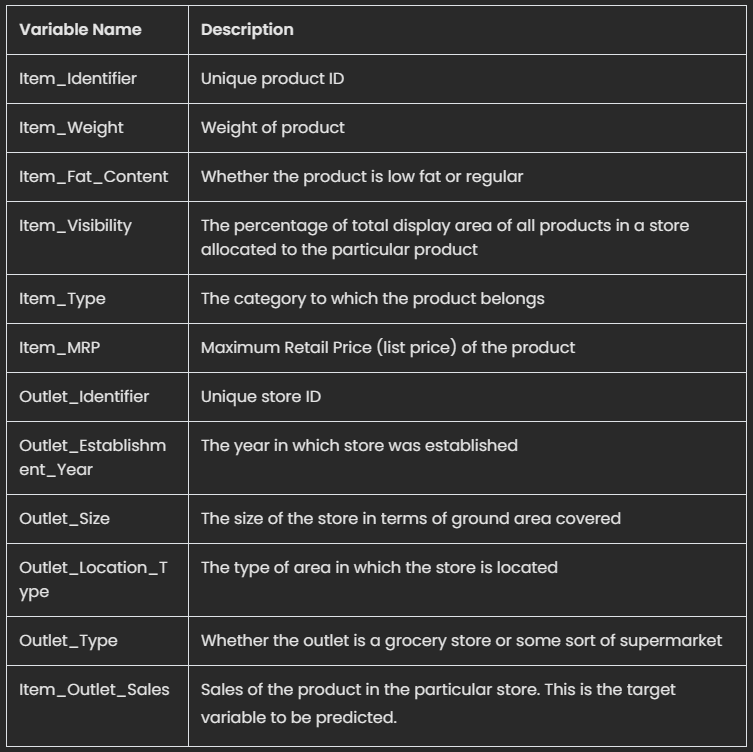





## **Import Libraries**

In [333]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## Seaborn
import seaborn as sns
## Matplotlib
import matplotlib.pyplot as plt

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

## **Load and Inspect Data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Projects/sales_predictions.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


> - Use Pandas to read the sales prediction data set into Google Colab.  
- Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.

## **Data Cleaning**

###Check how many rows and columns the data has###

In [8]:
df.shape

(8523, 12)

In [9]:
print(f"There is {df.shape[0]} rows, and {df.shape[1]} columns in the data")

There is 8523 rows, and 12 columns in the data


###Check datatypes of each variable

In [10]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###Check duplicates

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
print(f"There are {df.duplicated().sum()} duplicated values in the dataset")

There are 0 duplicated values in the dataset


###Identify missing values

In [14]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are some NA values on Item Weight and Outlet Size.


- Imputing missing values for numerical column with its median.

In [15]:
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- For categorical like Outler_Size column, replacing Unknown with all missing values to not creating bias for the values of this column. 

In [16]:
df['Outlet_Size'].fillna('Unknown', inplace=True)

In [17]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
print(f"There is {df.isna().sum().sum()} missing values in the dataset")

There is 0 missing values in the dataset


### Check for Inconsitency categories of data 

In [19]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [20]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].astype(str)

In [22]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

*Double checking on other suspected columns*

In [24]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [25]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

###Obtain the summary statistics of each.

In [26]:
stats = df.describe().round(2)

In [27]:
stats.loc[['mean','min','max']]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
mean,12.81,0.07,140.99,1997.83,2181.29
min,4.56,0.00,31.29,1985.00,33.29
max,21.35,0.33,266.89,2009.00,13086.96


##**Exploratory Data Analysis**

The exploratory data analysis of this dataset will include:  
  - Histogram to view the distributions of various features in your dataset.
  - Boxplot to view statistical summaries of various features in your dataset.
  - Heatmap of the correlation between features.

##**Numeric column**

In [374]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- For each numeric column, we will plot the histogram distribution and a boxplot

In [375]:
df.describe(include ='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [376]:
num_col = df.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

###EDA Using Function For Numerical Columns

Column-by-Column EDA using a function

- mean is red line
- median is cyan line 

I will not visual 'Outlet_Establishment_Year' as this column only show the counts of particular year that outlets established.

In [377]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [414]:
def plot_numeric(df,col):
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows = 2,figsize= (10,12), sharex = True)
  ## Use seaborn plot
  sns.histplot(data = df, x = col, ax = axes[0],kde=True, fill=True)
  mean_value = df[col].mean()
  #add vertical mean value line
  axes[0].axvline(mean_value,color='red', ls='-',);
  sns.boxplot(data = df, x =col, ax = axes[1],
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.2, .1, .2, .3)},
    medianprops={"color": "cyan"});
  ##set title for column
  axes[0].set_title(f'Histogram for {col}')
  axes[1].set_title(f'Boxplot for {col}')
  sns.set_theme(style="ticks", palette=None)
  ## fixing overlapping labels and showing
  plt.tight_layout()
  plt.show()

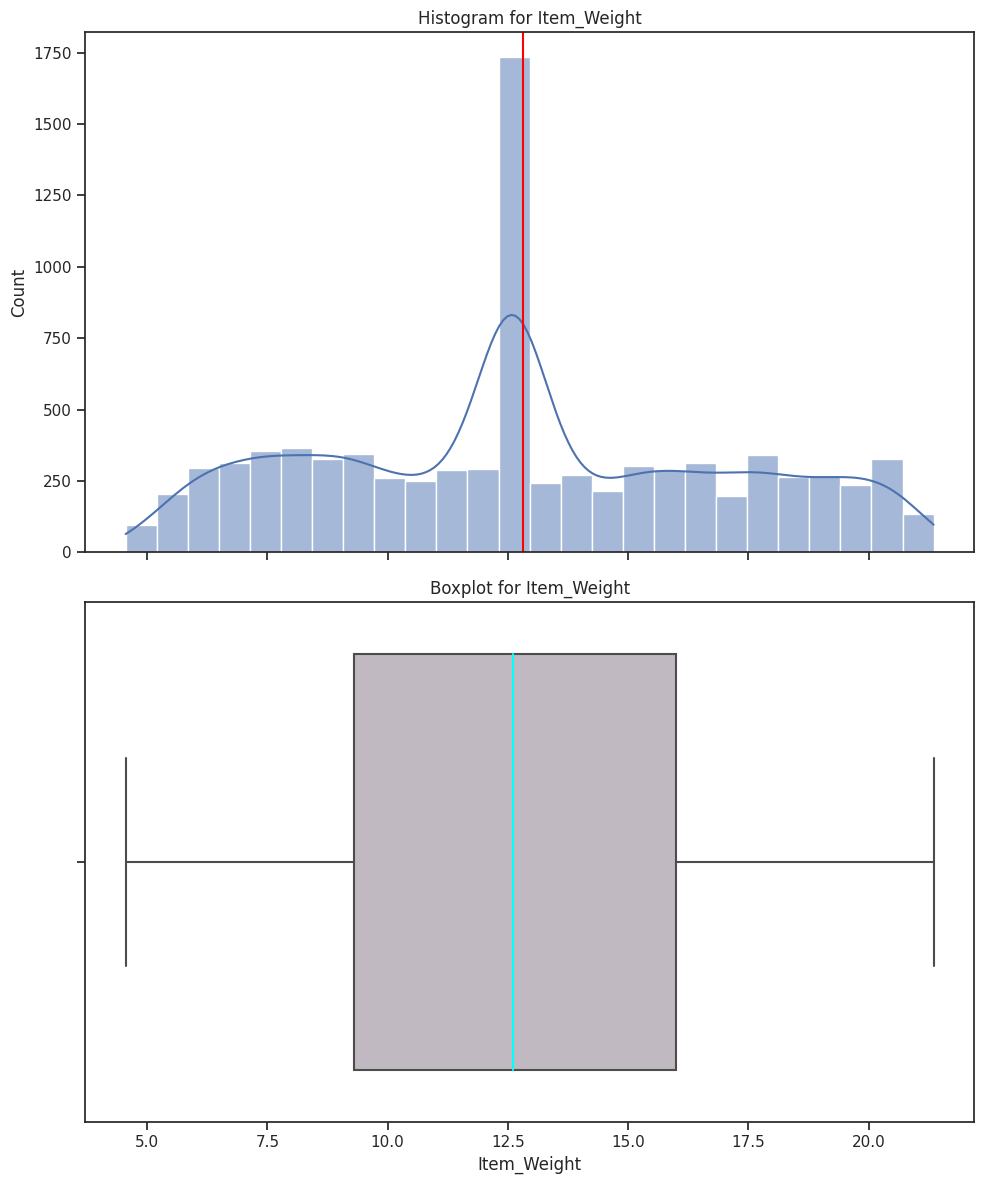

In [415]:
plot_numeric(df, 'Item_Weight')

- We can see that median is around 12.5 for this column.
- The boxplot shows that there is no outliers

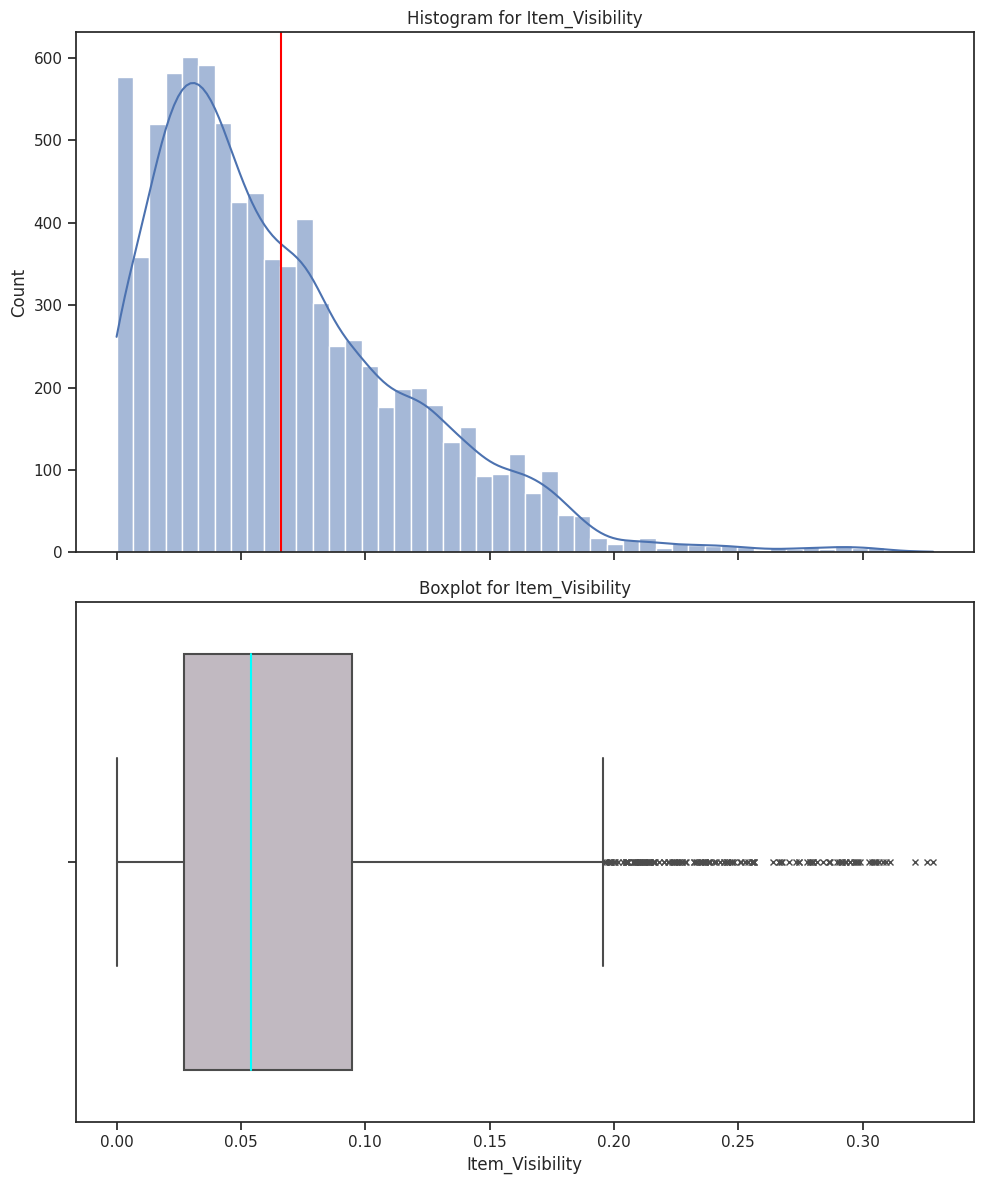

In [416]:
plot_numeric(df,'Item_Visibility')

- We can see that the distribution of Item visibility is skewed to the right.
- Median is around 0.06
- A lot of outliers on the right side.

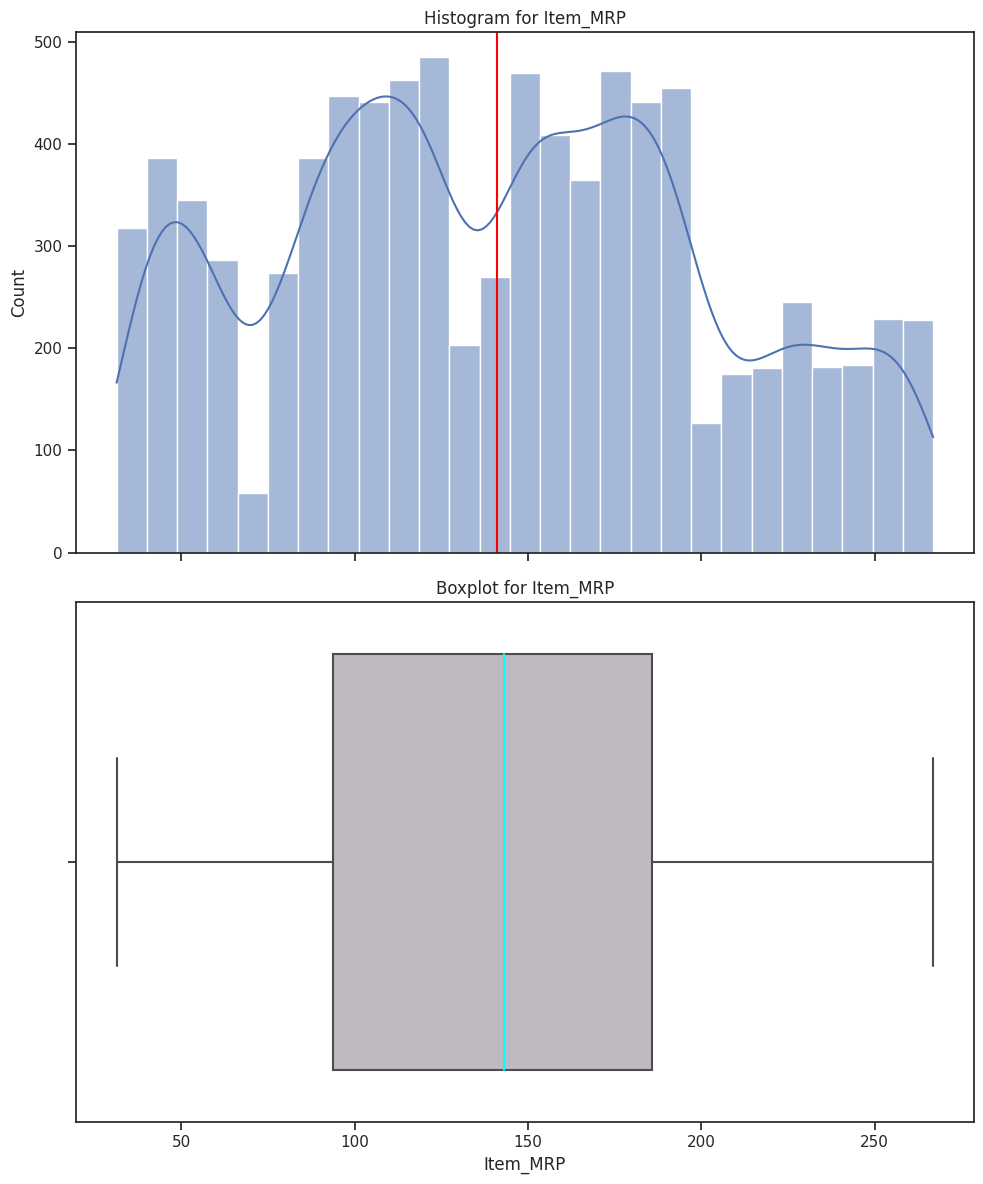

In [417]:
plot_numeric (df,'Item_MRP')

- We can see that the price of items in dataset are well distributed along their range of MRP.
- Median and Mean are closed to each others ~ 140.

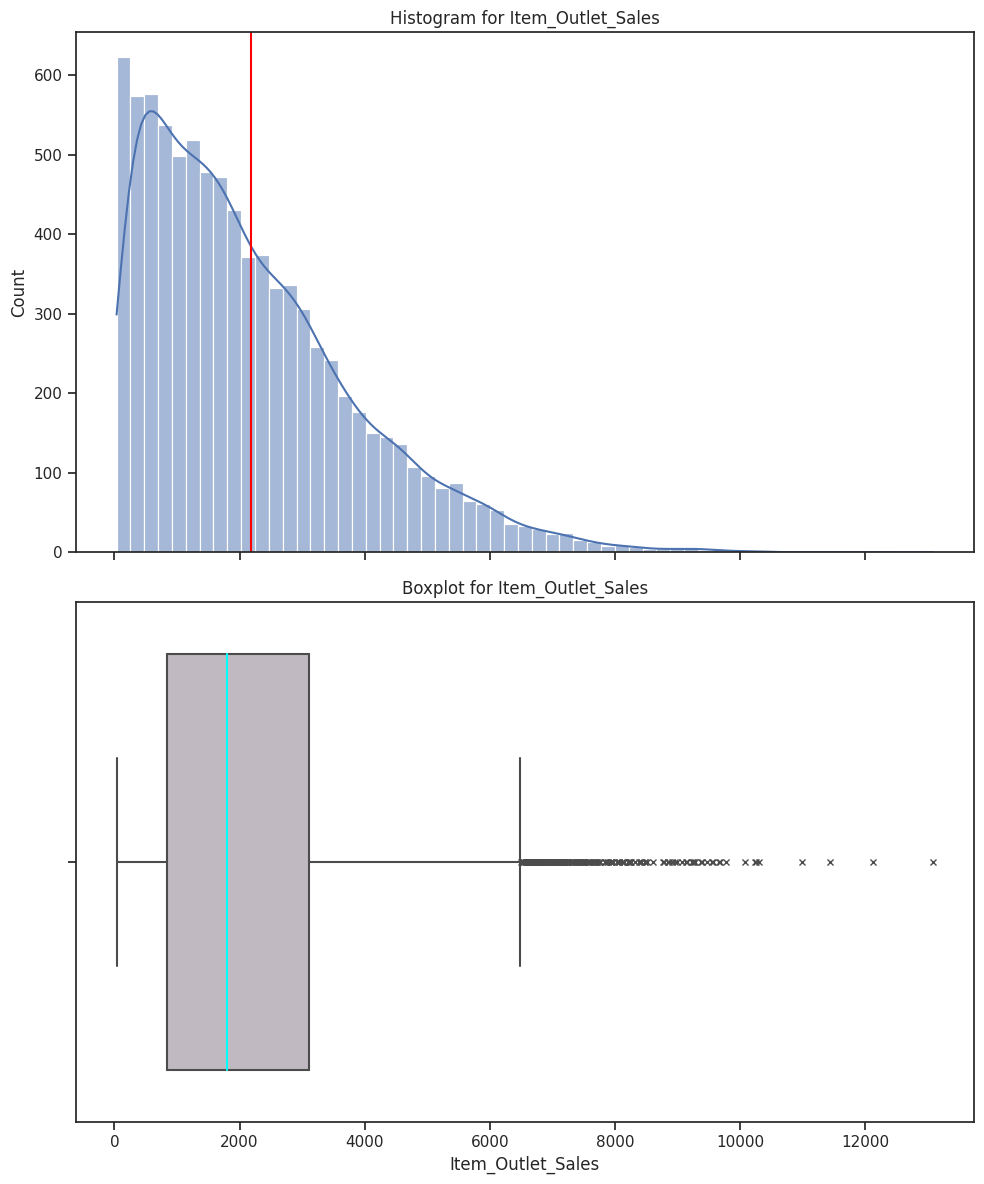

In [418]:
plot_numeric(df,'Item_Outlet_Sales')

- With this skewed to the right this columns, we can see that the sale of outlets mostly lie around the Q1 percentile.
- Median is approximately at $1900

##**Categorical Columns**

###EDA Using Function For Categorical Columns

- Observe the categorical counts of all of the object type columns and visualize this information with a barplot

In [419]:
categorical_col = df.select_dtypes('object').columns
categorical_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

EDA Function:

In [420]:
def plot_bar(df, x):
  fig, ax= plt.subplots(figsize= (10,12))
  #counting up to the categories, sort the values of the column, change it to data frame
  counts = df[x].value_counts().sort_values(ascending=False).to_frame()
  sns.barplot(data = counts, x = counts.index, y = counts[x], ax = ax)
  plt.xticks(rotation = 90)
  ax.set_title(f'Categorical Frequencies of {str(x)}', fontsize = 15, fontweight = 'bold');
  ax.set_xlabel(f'Categories for {str(x)}')
  ax.set_ylabel('Counts')
  plt.show()
  return fig,ax


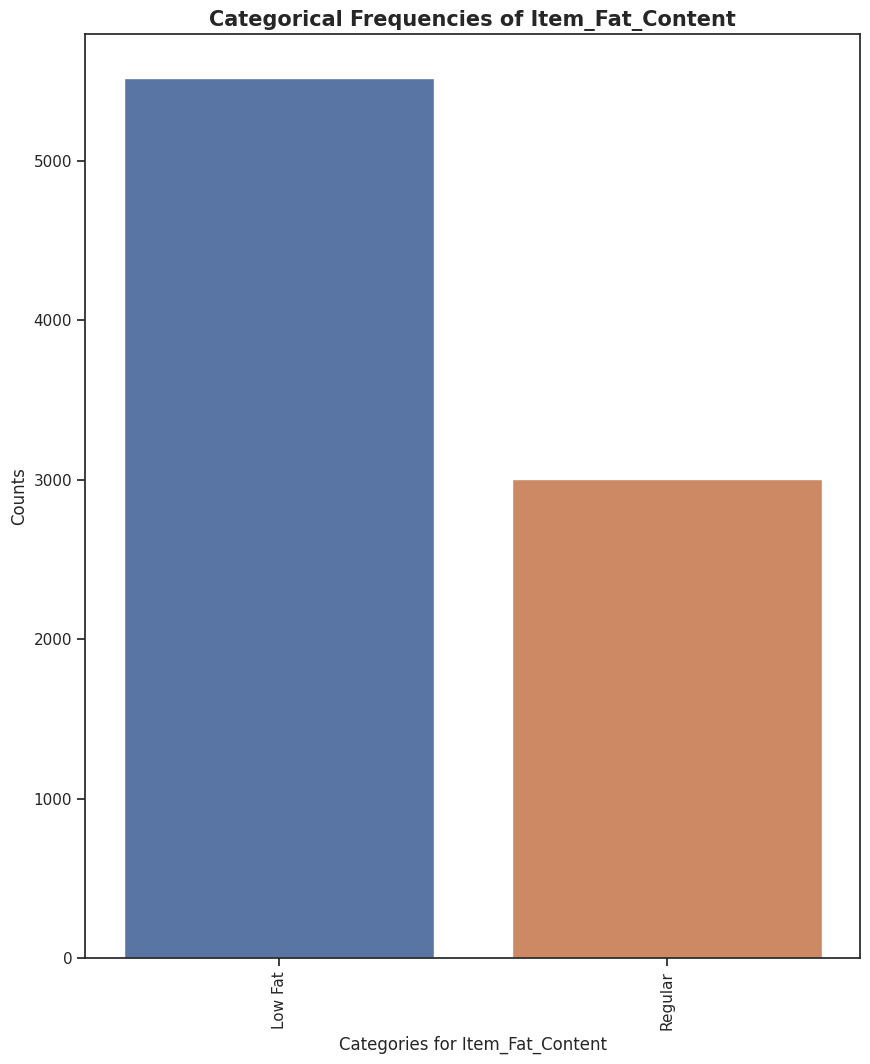

In [421]:
fig, ax = plot_bar(df, 'Item_Fat_Content');

From the bar plot we can see that Low Fat Item are more popular in the products market.

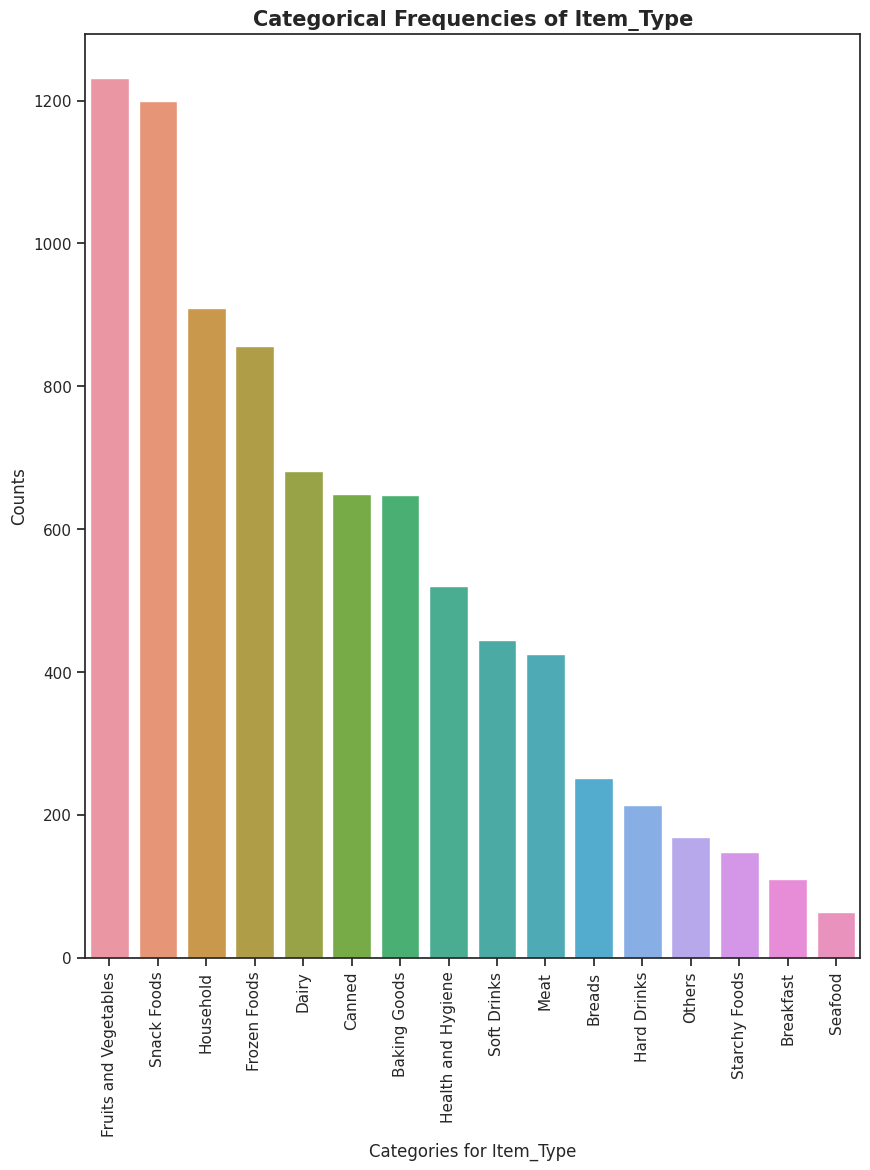

In [422]:
fig, ax = plot_bar(df, 'Item_Type');

- We can see that all types of items are well distributed in the dataset.
- Fruits and Vegetables is the most popular in count.

### EDA for Correlated Features

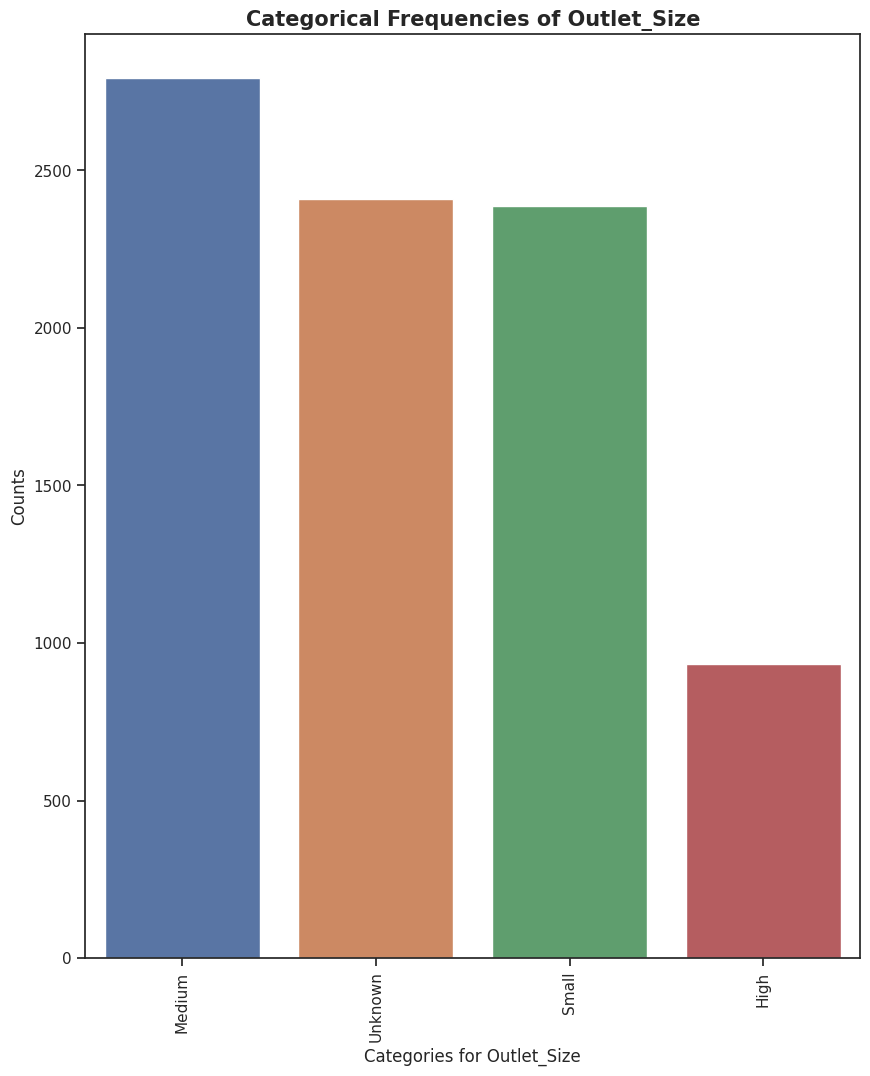

In [423]:
fig, ax = plot_bar(df, 'Outlet_Size');

We can see that the Unknown outlet size are too much in this dataset so for this specific column we can't conclude anything about the dataset.

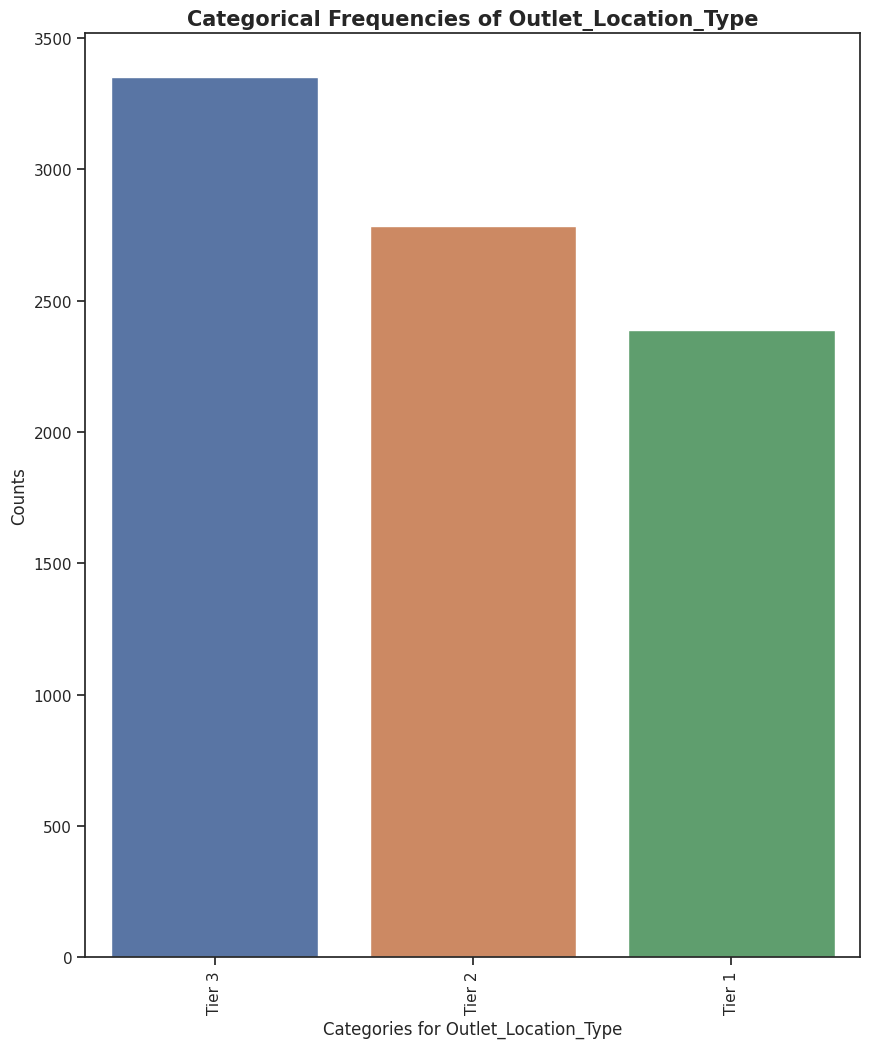

In [424]:
fig, ax = plot_bar(df, 'Outlet_Location_Type');

- Tier 3 is the most frequent in count in the location type.

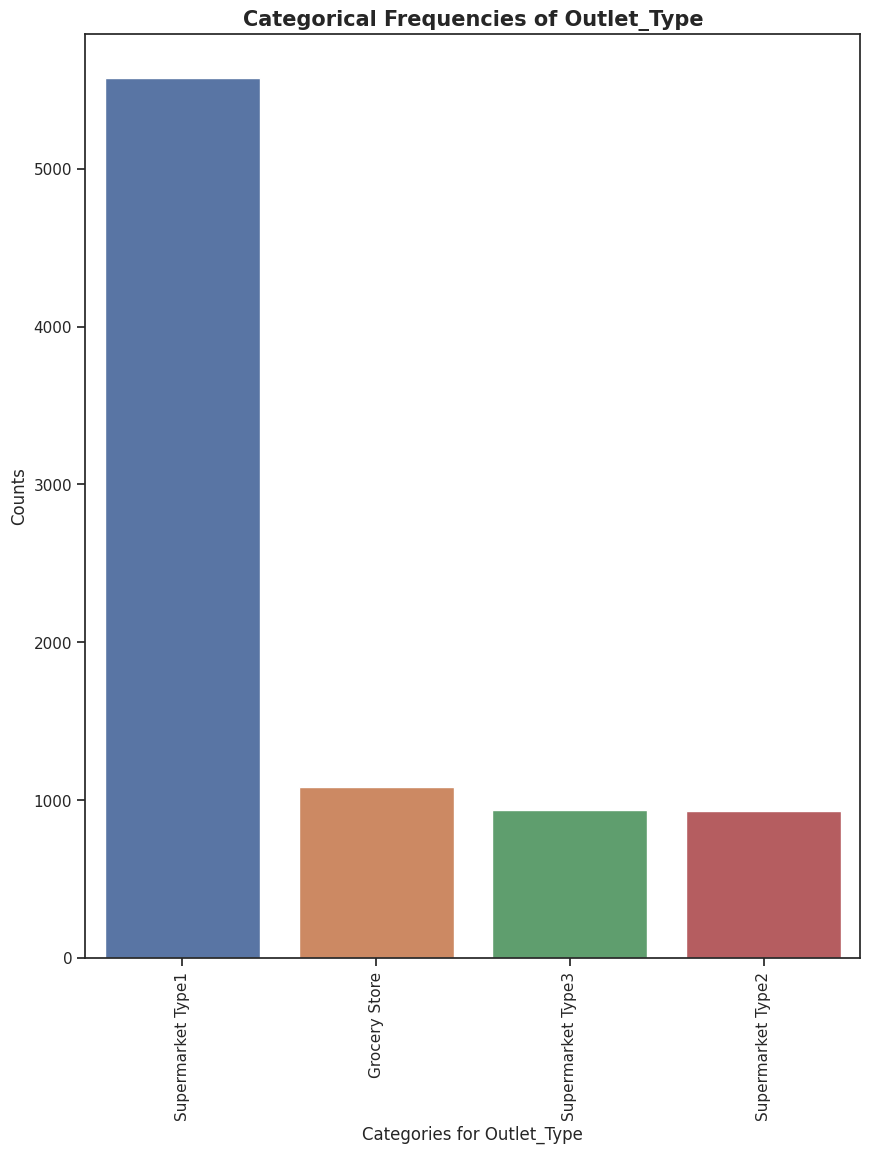

In [425]:
fig, ax = plot_bar(df, 'Outlet_Type');

- With this dataset, supermarket type 1 is dominating the outlet type.

###EDA by using scatter plot function

> From the boxplot and histogram we can only see the relationship between Item MRP and Item Outlet size and between Item Visibility and Item Outlet size 


In [426]:
def scatter_plot(df,col,row):
  fig, axes = plt.subplots(figsize= (10,12), sharex = True)
  sns.regplot(x = col, y = row, data = df, line_kws={'color':'red'},  color='cyan')
  axes.set_title(f'Scatter for {col} & {row}',fontsize = 20, fontweight = 'bold');
  plt.tight_layout()
  plt.show()


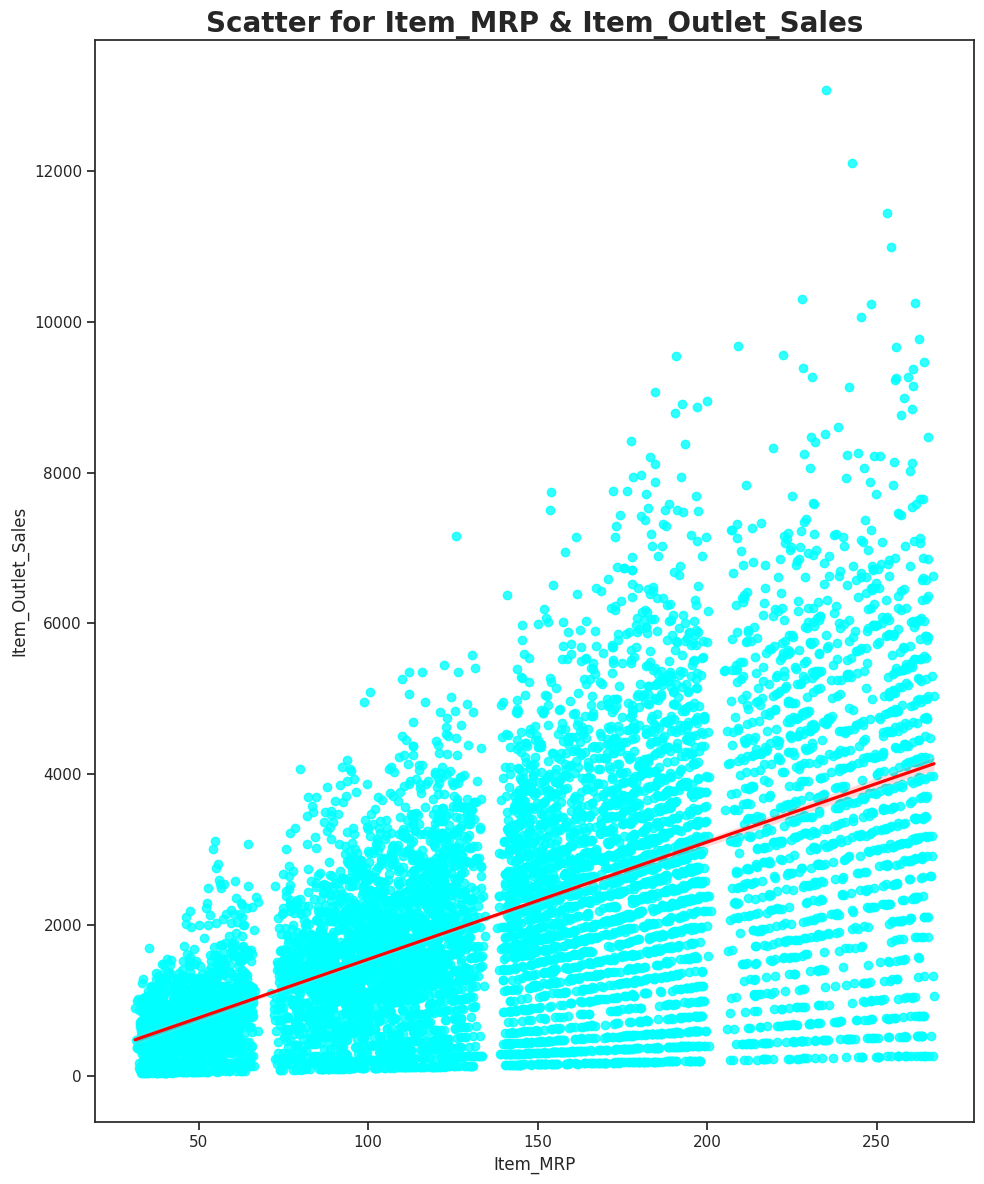

In [427]:
scatter_plot(df,'Item_MRP', 'Item_Outlet_Sales')

This is a positive correlation.
The more expensive in MRP will incresing the sales of the outlet but not significant. 

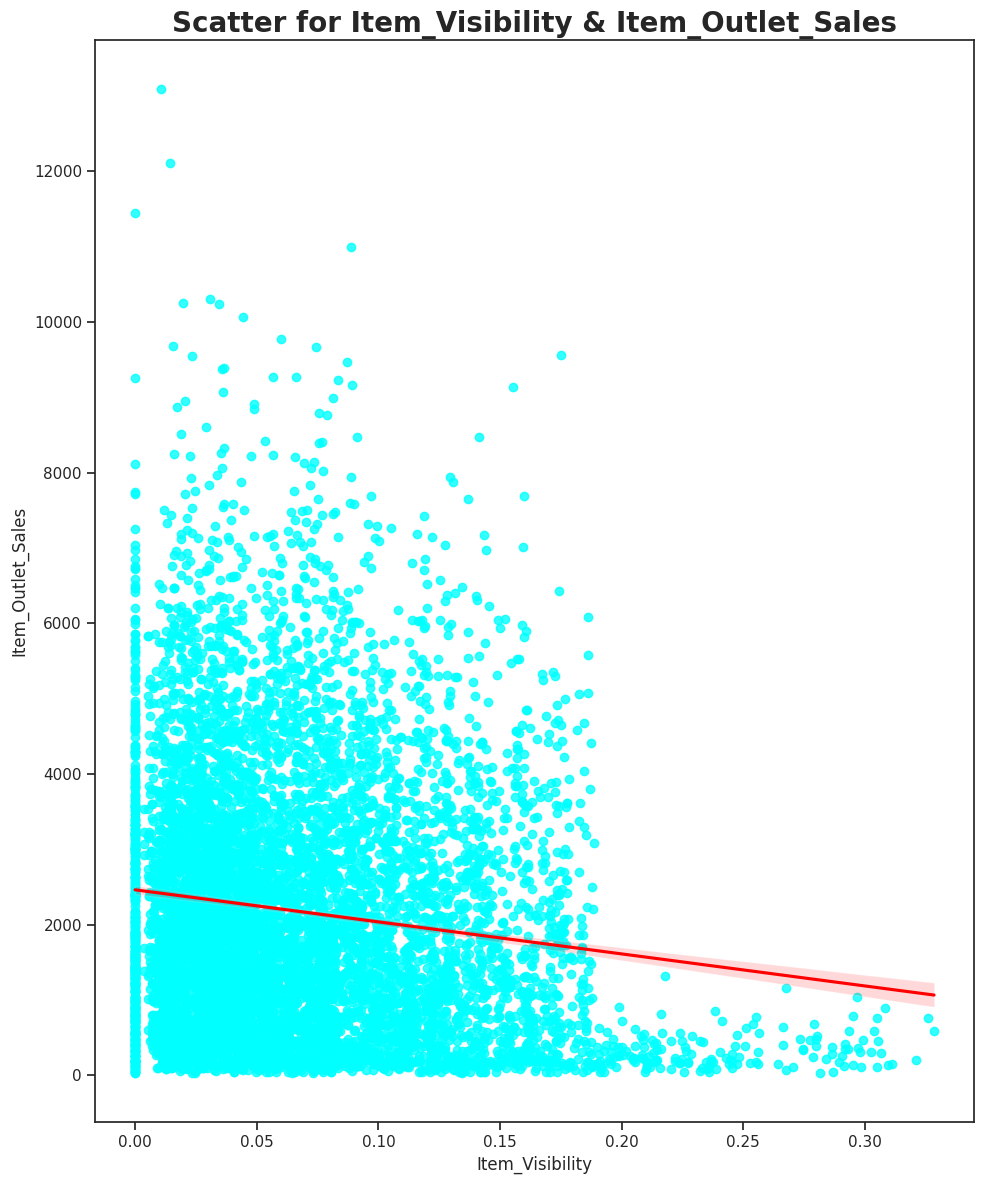

In [428]:
scatter_plot(df,'Item_Visibility', 'Item_Outlet_Sales')

This is a negative correlation. The easier Item can be find will decrease the sales of the outlets

###Heatmap

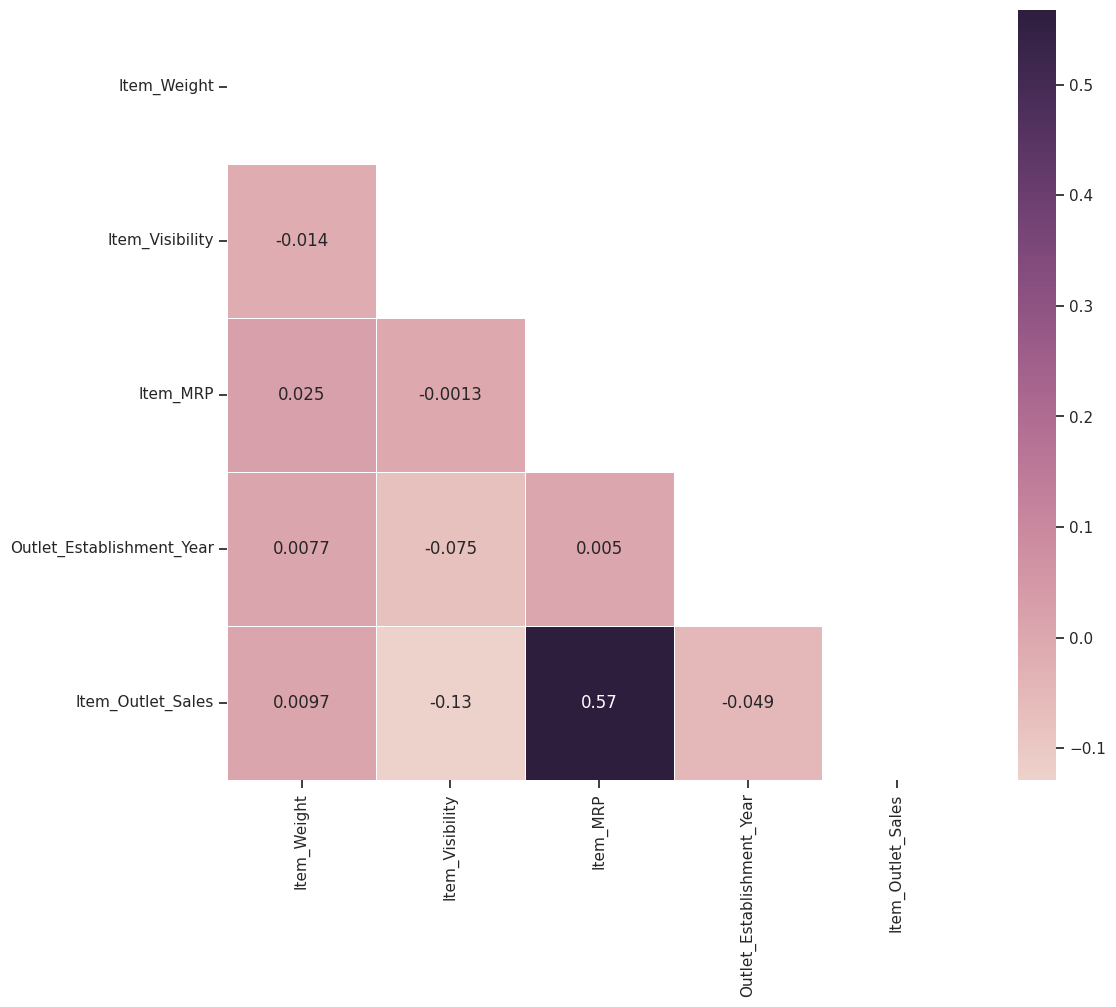

In [399]:
# To get a triangle correlation map and hide duplicate values as well as the diagonal of all the values with themselves, use the mask argument
# We will first define the area to be masked (blocked)
# np.ones_like(corr) creates an array of all 1s of the same shape as the corr dataframe we just made
# np.triu() will just return the upper triangle of any array 
# by masking (blocking) the upper triangle in our heatmap, we are left with only the lower triangle
mask = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot = True, mask = mask,linewidth=.7);

- There aren't really any strong or even moderate correlations shown here.
- The most significant correlation between Item_Outlet_Sales and Item_MRP
- The weakest correlated is between Item_Visibility and Item MRP. 

###Big pictures EDA:

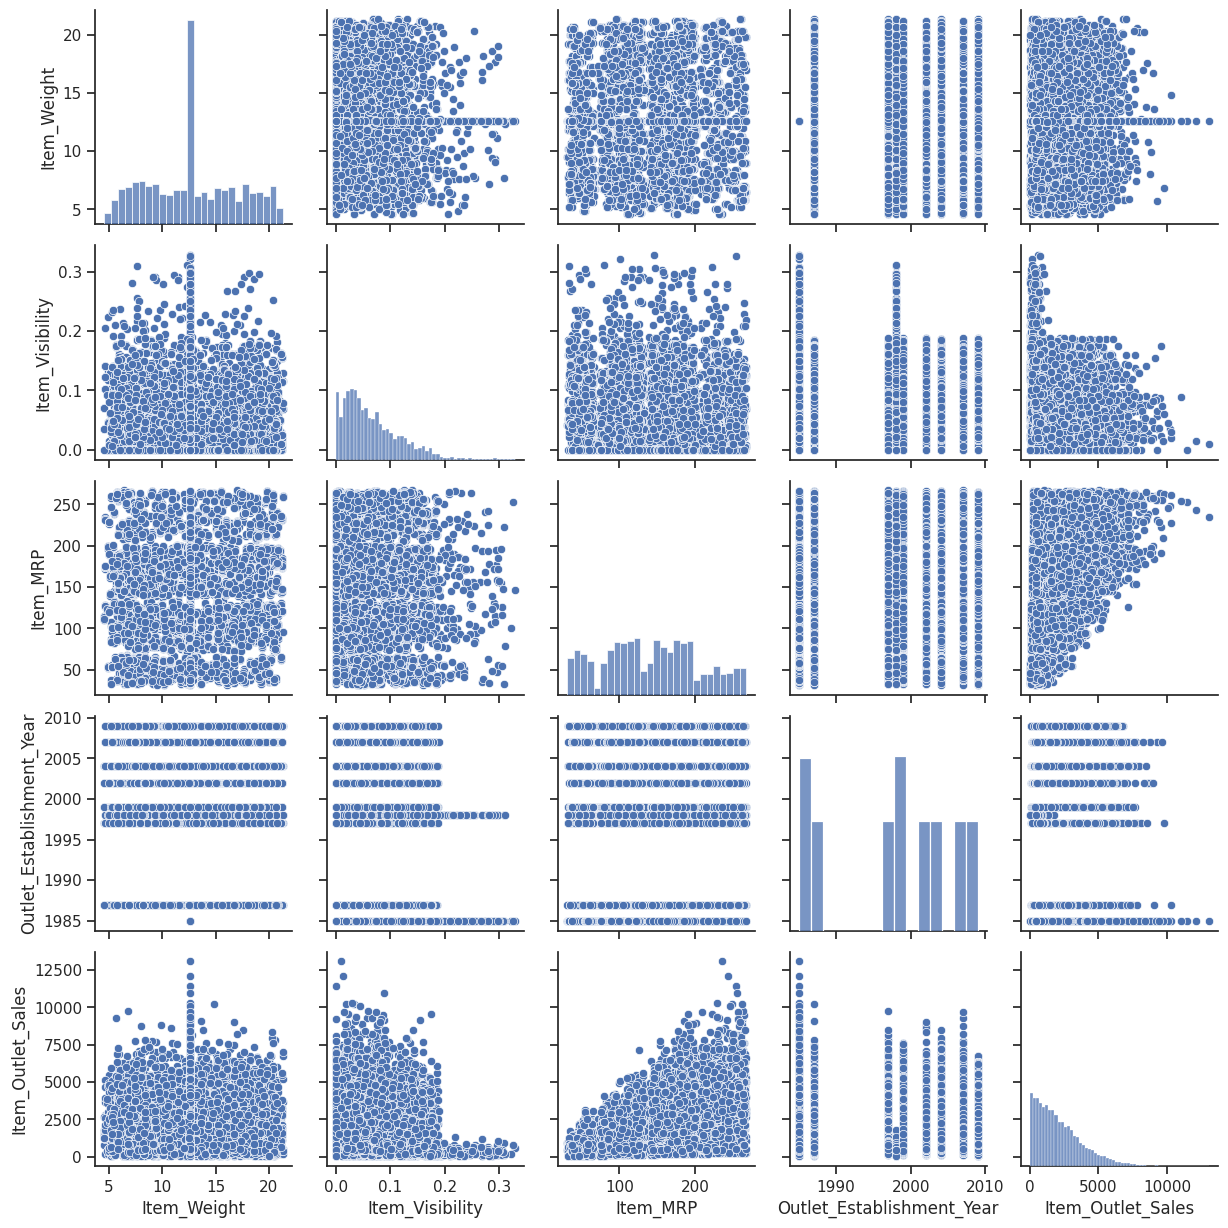

In [334]:
sns.pairplot(df);

## Explanatory Data Analysis